# Food Safety (Data Cleaning and EDA)

## Cleaning and Exploring Data with Pandas


In this project, I will investigate restaurant food safety scores for restaurants in San Francisco. The scores and violation information have been [made available by the San Francisco Department of Public Health](https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores-LIVES-Standard/pyih-qa8i). The main goal for this assignment is to walk through the process of Data Cleaning and familiarise myself with some of the `pandas` functions.


In [69]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

from IPython.display import display, Image 
def display_figure_for_grader(fig):
    plotly.io.write_image(fig, 'temp.png')
    display(Image('temp.png'))

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# 0: Obtaining the Data

## File Systems and I/O


In [70]:
from pathlib import Path
data_dir = Path('.') # Create a Path object to the current working directory
data_dir.mkdir(exist_ok = True) # Create a directory 
file_path = data_dir / Path('data.zip') # Create a path to the .zip file that contains our datasets
dest_path = file_path

*Note*: The command below starts with an `!`. This tells our Jupyter Notebook to pass this command to the operating system. In this case, the command is the `ls` Unix command, which lists files in the current directory.

In [71]:
!ls 

data        data.zip    hw02A.ipynb


## Looking Inside and Extracting the Zip Files

1. Assign `my_zip` to a `zipfile.Zipfile` object representing `data.zip`, and assign `list_names` to a list of all the names of the contents in `data.zip`.

In [72]:
import zipfile
my_zip = zipfile.ZipFile(dest_path, 'r') # Read .zip file at dest_path, which is data.zip
list_names = my_zip.namelist() # Create list of names of contens in data.zip
list_names

['data/',
 'data/bus.csv',
 'data/ins.csv',
 'data/ins2vio.csv',
 'data/vio.csv',
 'data/sf_zipcodes.json',
 'data/legend.csv']

2. Display the files' names and their sizes.

In [73]:
my_zip = zipfile.ZipFile(dest_path, 'r') # Read .zip file at dest_path, which is data.zip
for info in my_zip.infolist(): # Extract information about contents of .zip file, iterate through them
    print('{}\t{}'.format(info.filename, info.file_size)) # Print file name and uncompressed file size

data/	0
data/bus.csv	665365
data/ins.csv	1860919
data/ins2vio.csv	1032799
data/vio.csv	4213
data/sf_zipcodes.json	474
data/legend.csv	120


3. Unzip the CSV files into a sub-directory called data.

In [74]:
data_dir = Path('.') # Create a path to current working directory
my_zip.extractall(data_dir) # Extract all contents from data.zip
!ls {data_dir / Path("data")} # List out contents of "data" sub-directory

bus.csv          ins2vio.csv      sf_zipcodes.json
ins.csv          legend.csv       vio.csv


4. Defined a helper function that will allow to retrieve the first N lines of a file as a list.

    For example, head('data/legend.csv', 5) will return the first 5 lines of data/legend.csv.gz. Run the cell below to print out the first 5 lines of all six files that we just extracted from the zip file.


In [75]:
import os

def head(filename, lines=5):
    """
    Returns the first few lines of a file.
    
    filename: the name of the file to open
    lines: the number of lines to include
    
    return: A list of the first few lines from the file.
    """
    from itertools import islice
    with open(filename, "r") as f: # Open file for reading
        return list(islice(f, lines)) # Return first five lines of the file as a list

data_dir = "./" # Path to current working directory
for f in list_names: # Iterate through names of contents in "data" sub-directory
    if not os.path.isdir(f): # Check if specified path is a directory
        print(head(data_dir + f, 5), "\n") # Create path to respective file in "data" sub-directory, use `head` function defined above


['"business id column","name","address","city","state","postal_code","latitude","longitude","phone_number"\n', '"1000","HEUNG YUEN RESTAURANT","3279 22nd St","San Francisco","CA","94110","37.755282","-122.420493","-9999"\n', '"100010","ILLY CAFFE SF_PIER 39","PIER 39  K-106-B","San Francisco","CA","94133","-9999","-9999","+14154827284"\n', '"100017","AMICI\'S EAST COAST PIZZERIA","475 06th St","San Francisco","CA","94103","-9999","-9999","+14155279839"\n', '"100026","LOCAL CATERING","1566 CARROLL AVE","San Francisco","CA","94124","-9999","-9999","+14155860315"\n'] 

['"iid","date","score","type"\n', '"100010_20190329","03/29/2019 12:00:00 AM","-1","New Construction"\n', '"100010_20190403","04/03/2019 12:00:00 AM","100","Routine - Unscheduled"\n', '"100017_20190417","04/17/2019 12:00:00 AM","-1","New Ownership"\n', '"100017_20190816","08/16/2019 12:00:00 AM","91","Routine - Unscheduled"\n'] 

['"iid","vid"\n', '"97975_20190725","103124"\n', '"85986_20161011","103114"\n', '"95754_2019032

## Reading in and Verifying Data

1. Load `bus.csv`, `ins2vio.csv`, `ins.csv`, and `vio.csv` into `pandas` `DataFrame`s with the following names: `bus`, `ins2vio`, `ins`, and `vio`, respectively.


In [76]:
# Path to the directory containing data
dsDir = Path('data')

bus = pd.read_csv(dsDir/'bus.csv', encoding='ISO-8859-1')
ins2vio = pd.read_csv(dsDir/'ins2vio.csv')
ins = pd.read_csv(dsDir/'ins.csv')
vio = pd.read_csv(dsDir/'vio.csv')

2. Show multiple return outputs in one single cell using `display()`. 

In [77]:
display(bus.head())
display(ins2vio.head())
display(ins.head())
display(vio.head())

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


,iid,vid
0,97975_20190725,103124
1,85986_20161011,103114
2,95754_20190327,103124
3,77005_20170429,103120
4,4794_20181030,103138


,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


,description,risk_category,vid
0,Consumer advisory not provided for raw or unde...,Moderate Risk,103128
1,Contaminated or adulterated food,High Risk,103108
2,Discharge from employee nose mouth or eye,Moderate Risk,103117
3,Employee eating or smoking,Moderate Risk,103118
4,Food in poor condition,Moderate Risk,103123


<br/>

---

<br/>

# 1: Examining the Business Data File

## Section 1-1

In [78]:
bus.head()

,business id column,name,address,city,state,postal_code,latitude,longitude,phone_number
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675


Rename `business id column` column to `bid` for simplicity.

In [79]:
bus = bus.rename(columns = {"business id column": "bid"})

Check if `bid` is unique for each record.

In [80]:
is_bid_unique = len(bus["bid"].unique()) == len(bus)
is_bid_unique

True

<br/>

---


## Section 1-2

We will now work with some important fields in `bus`.

1. Assign `top_names` to a `NumPy` array or list containing the top 6 most frequently used business names, from most frequent to least frequent. 
2. Assign `top_addresses` to a `NumPy` array or list containing the top 6 addresses where businesses are located, from most popular to least popular.

In [81]:
top_names = bus["name"].value_counts().head(6).index.to_numpy()
top_addresses = bus["address"].value_counts().head(6).index.to_numpy()

display(top_names)
display(top_addresses)

array(["Peet's Coffee & Tea", 'Starbucks Coffee', "McDonald's",
       'Jamba Juice', 'STARBUCKS', 'Proper Food'], dtype=object)

array(['Off The Grid', '428 11th St', '2948 Folsom St', '3251 20th Ave',
       'Pier 41', '103 Horne Ave'], dtype=object)


**Each record in the `bus` `DataFrame` represent one location of a restaurant.**


<br/>

---

<br/>

# 2: Cleaning the Business Data Postal Codes

The business data contains postal code information that we can use to aggregate the ratings over regions of the city. Let's examine and clean the postal code field. The postal code (sometimes also called a [ZIP code](https://en.wikipedia.org/wiki/ZIP_Code)) partitions the city into regions:

<img src="https://gisgeography.com/wp-content/uploads/2023/07/San-Francisco-Zip-Code-Map-1-2048x2048.jpg" alt="ZIP Code Map" style="width: 600px">

<br/>

---


## Section 2-1

Examine how many restaurants are in each ZIP code by creating a **Series** where the index is the postal code, and the value is the number of records with that postal code.


In [82]:
zip_counts = bus["postal_code"].value_counts()
print(zip_counts.to_string())

postal_code
94103         562
94110         555
94102         456
94107         408
94133         398
94109         382
94111         259
94122         255
94105         249
94118         231
94115         230
94108         229
94124         218
94114         200
-9999         194
94112         192
94117         189
94123         177
94121         157
94104         142
94132         132
94116          97
94158          90
94134          82
94127          67
94131          49
94130           8
94143           5
94301           2
94188           2
94101           2
CA              2
94013           2
941102019       1
941             1
95112           1
94105-2907      1
94102-5917      1
94124-1917      1
94621           1
95122           1
95132           1
95109           1
95133           1
95117           1
94901           1
94105-1420      1
94544           1
64110           1
94122-1909      1
00000           1
94080           1
Ca              1
94602           1
94129           

<br/>

--- 

## Section 2-2

In section 2-1, I noticed there is a large number of potentially invalid ZIP codes. These are likely due to data entry errors.

### Part i

Import a list of valid San Francisco ZIP codes by using `pd.read_json` to load the file `data/sf_zipcodes.json`, and store them as a Series in `valid_zips`. 

In [83]:
valid_zips = pd.read_json('data/sf_zipcodes.json')
valid_zips = valid_zips['zip_codes']

`pd.read_json` reads data as integers by default. However, I would like to store ZIP codes as strings. To do that, I used the `astype` function to generate a copy of the `pandas` `Series` stored as strings instead.

In [84]:
valid_zips = valid_zips.astype("string")

### Part ii

 Construct a `DataFrame` containing only the businesses that **DO NOT** have valid ZIP codes.

In [85]:
invalid_zip_bus = bus[~bus['postal_code'].isin(valid_zips)]
invalid_zip_bus.head(20)

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number
22,100126,Lamas Peruvian Food Truck,Private Location,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
68,100417,"COMPASS ONE, LLC",1 MARKET ST. FL,San Francisco,CA,94105-1420,-9999.000000,-9999.000000,14154324000
96,100660,TEAPENTER,1518 IRVING ST,San Francisco,CA,94122-1909,-9999.000000,-9999.000000,14155868318
109,100781,LE CAFE DU SOLEIL,200 FILLMORE ST,San Francisco,CA,94117-3504,-9999.000000,-9999.000000,14155614215
144,101084,Deli North 200,1 Warriors Way Level 300 North East,San Francisco,CA,94518,-9999.000000,-9999.000000,-9999
156,101129,Vendor Room 200,1 Warriors Way Level 300 South West,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
177,101192,Cochinita #2,2 Marina Blvd Fort Mason,San Francisco,CA,-9999,-9999.000000,-9999.000000,14150429222
276,102014,"DROPBOX (Section 3, Floor 7)",1800 Owens St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
295,102245,Vessell CA Operations (#4),2351 Mission St,San Francisco,CA,-9999,-9999.000000,-9999.000000,-9999
298,10227,The Napper Tandy,3200 24th St,San Francisco,CA,-9999,37.752581,-122.416482,-9999


<br/>

--- 

## Section 2-3

In the previous part, many of the businesses had a common invalid postal code that was likely used to encode a MISSING postal code. In the following cells, I will construct a series that counts the number of businesses at each `address` that have this single likely MISSING postal code value.

### Part i
I identified the single common missing postal code as -9999 and assigned it to `missing_postal_code`. Then I created a `DataFrame`, `bus_missing`, to store only those businesses in `bus` that have `missing_postal_code` as their postal code.

In [86]:
missing_postal_code = '-9999'
bus_missing = bus[bus['postal_code'] == missing_postal_code]

### Part ii
Using `bus_missing`, I found the number of businesses at each address (which would all share the same postal code). `missing_zip_address_count` stores a `Series` with addresses as the indices and the counts as the values.

In [87]:
missing_zip_address_count = bus_missing['address'].value_counts()
missing_zip_address_count.head()

address
Off The Grid                  39
Off the Grid                  10
OTG                            4
Approved Locations             3
Approved Private Locations     3
Name: count, dtype: int64

**If we drop businesses with postal code values equal to missing_postal_code, we may exclude businesses operating across multiple locations or businesses that do not have fixed address. Foodtrucks or pop-up stores might not have a standard zip code.**

<!-- END QUESTION -->

<br/>

--- 

## Section 2-4

I will Examine the `invalid_zip_bus` `DataFrame` and look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9-digit code rather than the first 5 digits. ** I will create a new column named `postal5` in the original `bus` `DataFrame`, which contains only the first 5 digits of the `postal_code` column.**

Then, for any of the `postal5` ZIP code entries that were not a valid San Francisco ZIP code (according to `valid_zips`), the provided code will set the `postal5` value to `None`. 


In [88]:
bus['postal5'] = None
bus['postal5'] = bus['postal_code'].str[:5]

bus.loc[~bus['postal5'].isin(valid_zips), 'postal5'] = None
# Checking the corrected postal5 column
bus.loc[invalid_zip_bus.index, ['bid', 'name', 'postal_code', 'postal5']]

,bid,name,postal_code,postal5
22,100126,Lamas Peruvian Food Truck,-9999,None
68,100417,"COMPASS ONE, LLC",94105-1420,94105
96,100660,TEAPENTER,94122-1909,94122
109,100781,LE CAFE DU SOLEIL,94117-3504,94117
144,101084,Deli North 200,94518,None
...,...,...,...,...
6173,99369,HOTEL BIRON,94102-5917,94102
6174,99376,Mashallah Halal Food truck Ind,-9999,None
6199,99536,FAITH SANDWICH #2,94105-2907,94105
6204,99681,Twister,95112,None


<br/>

---

<br/>

## Section 2-5

Finally, I will use the `postal5` column to create a `DataFrame`, `bus_valid`, that only contains the rows of `bus` where a `postal5` zip code exists.

In [89]:
bus_valid = bus[~bus['postal5'].isna()]
bus_valid

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000000,-9999.000000,14154827284,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,94124
...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253,94118
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999,94107
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280,94102
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085,94103


<br/>

---

<br/>

# 3: Investigate the Inspection Data

I will start observing the inspection `DataFrame`. Earlier, I found that `ins` has 4 columns named 
`iid`, `score`, `date`, and `type`.  In this section, I will determine the granularity of `ins` and investigate the kinds of information provided for the inspections. 

Let's start by looking again at the first 5 rows of `ins` to see what we're working with.

In [41]:
ins.head(5)

,iid,date,score,type
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup


<br/>

---

## Section 3-1

I want to extract `bid` from each row of the `ins` `DataFrame`. The column `iid` of the `ins` `DataFrame` appears to be composed of two numbers, and the first number looks like a business ID.  

I will create a new column called `bid` in the `ins` Dataframe containing just the business ID. I want to use `ins['iid'].str` operations.

In [46]:
ins['bid'] = ins['iid'].str.split('_').str[0].astype(int)
ins.head(5)

,iid,date,score,type,bid
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017


<br/>

---

## Section 3-2


### Part i

I will find the type of the individual `ins['date']` entries.

In [48]:
ins_date_type = type(ins['date'].iloc[0])
ins_date_type

str

### Part ii
Rather than the type I discovered in Part 1, I want each entry in `pd.TimeStamp` format. I might expect that the usual way to convert something from its current type to `TimeStamp` would be to use `astype`. Using `pd.to_datetime`, I will create a new `ins['timestamp']` column containing `pd.Timestamp` objects. These will allow us to do date manipulation with much greater ease in parts iii and iv. 

In [50]:
format_string = '%m/%d/%Y %I:%M:%S %p'
ins['timestamp'] = pd.to_datetime(ins['date'], format = format_string)
ins['timestamp']

0       2019-03-29
1       2019-04-03
2       2019-04-17
3       2019-08-16
4       2019-08-26
           ...    
26658   2018-09-24
26659   2018-11-02
26660   2019-09-09
26661   2017-12-07
26662   2018-08-08
Name: timestamp, Length: 26663, dtype: datetime64[ns]

### Part iii

I will find the earliest and latest dates in our inspection data using `min` and `max` on dates of the correct type.

In [54]:
earliest_date = ins['timestamp'].min()
latest_date = ins['timestamp'].max()
print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

Earliest Date: 2016-10-04 00:00:00
Latest Date: 2019-11-28 00:00:00


### Part iv

I will create an additional `ins['year']` column containing just the year of the inspection. 

In [57]:
ins['year'] = ins['timestamp'].dt.year

<br/>

---

<br/>

# 4: Benford's Law

[Benford’s Law](https://en.wikipedia.org/wiki/Benford%27s_law), also known as the Law of Anomalous Numbers or the First Digit Law, is a phenomenon seen in many real-world datasets. In datasets where Benford’s Law applies, there is an overrepresentation of small numbers (e.g., 1 and 2) in the leading digits of numeric entries and an underrepresentation of large numbers (e.g., 8 and 9). Benford’s Law is observed in river lengths, national populations, and has even been used to investigate [financial fraud](https://www.acfe.com/acfe-insights-blog/blog-detail?s=what-is-benfords-law-and-why-fraud-examiners-use-it)! More about Benford’s Law can be found [here](https://www.scientificamerican.com/article/what-is-benfords-law-why-this-unexpected-pattern-of-numbers-is-everywhere/).

<img src="https://static.scientificamerican.com/sciam/assets/File/BenfordsLaw_graphic_d%5B68%5D.jpg?w=1350" alt="Benford's Law Distribution" style="width: 600px">

Let’s investigate whether or not the **address** numbers in the `bus_valid` `DataFrame` follow Benford’s Law.

## Section 4-1

First, I will create a new column, `first_char` that contains the first character of the address string of each restaurant in `bus_valid`.

In [59]:
bus_valid["first_char"] = bus_valid['address'].str[0]
bus_valid

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5,first_char
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999,94110,3
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.00,-9999.00,14154827284,94133,P
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.00,-9999.00,14155279839,94103,4
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.00,-9999.00,14155860315,94124,1
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.00,-9999.00,14159702675,94124,2
...,...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.00,-9999.00,14150452253,94118,3
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.00,-9999.00,-9999,94107,3
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.00,-9999.00,14155531280,94102,4
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.00,-9999.00,14150368085,94103,4


<br/>

---

## Section 4-2

Unfortunately, not all of the addresses in `bus_valid` started with a number. I will Create a new `DataFrame` `bus_digits` that only contains the rows of `bus_valid` where the restaurant's address starts with a digit between 1 and 9.

In [61]:
help(pd.Series.str.isnumeric)

Help on function isnumeric in module pandas.core.strings.accessor:

isnumeric(self)
    Check whether all characters in each string are numeric.
    
    This is equivalent to running the Python string method
    :meth:`str.isnumeric` for each element of the Series/Index. If a string
    has zero characters, ``False`` is returned for that check.
    
    Returns
    -------
    Series or Index of bool
        Series or Index of boolean values with the same length as the original
        Series/Index.
    
    See Also
    --------
    Series.str.isalpha : Check whether all characters are alphabetic.
    Series.str.isnumeric : Check whether all characters are numeric.
    Series.str.isalnum : Check whether all characters are alphanumeric.
    Series.str.isdigit : Check whether all characters are digits.
    Series.str.isdecimal : Check whether all characters are decimal.
    Series.str.isspace : Check whether all characters are whitespace.
    Series.str.islower : Check whether all char

In [106]:
bus_digits = bus_valid[bus_valid['address'].str[0].str.isnumeric()]
bus_digits = bus_digits[bus_digits['first_char'] != "0"]
bus_digits

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5,first_char
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755282,-122.420493,-9999,94110,3
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000000,-9999.000000,14155279839,94103,4
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000000,-9999.000000,14155860315,94124,1
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000000,-9999.000000,14159702675,94124,2
5,100036,Hula Truck (#2),2 Marina Blvd,San Francisco,CA,94123,-9999.000000,-9999.000000,-9999,94123,2
...,...,...,...,...,...,...,...,...,...,...,...
6248,99948,SUSIECAKES BAKERY,3509 CALIFORNIA ST,San Francisco,CA,94118,-9999.000000,-9999.000000,14150452253,94118,3
6249,99988,HINODEYA SOMA,303 02nd ST STE 102,San Francisco,CA,94107,-9999.000000,-9999.000000,-9999,94107,3
6250,99991,TON TON,422 GEARY ST,San Francisco,CA,94102,-9999.000000,-9999.000000,14155531280,94102,4
6251,99992,URBAN EXPRESS KITCHENS LLC,475 06th ST,San Francisco,CA,94103,-9999.000000,-9999.000000,14150368085,94103,4


<br/>

---

## Section 4-3

I will Plot a histogram that shows the frequency of each possible first digit among the addresses in `bus_digits`. I will create bins of unit length that are centered at each of the digits and assign it to `bins_arr`.

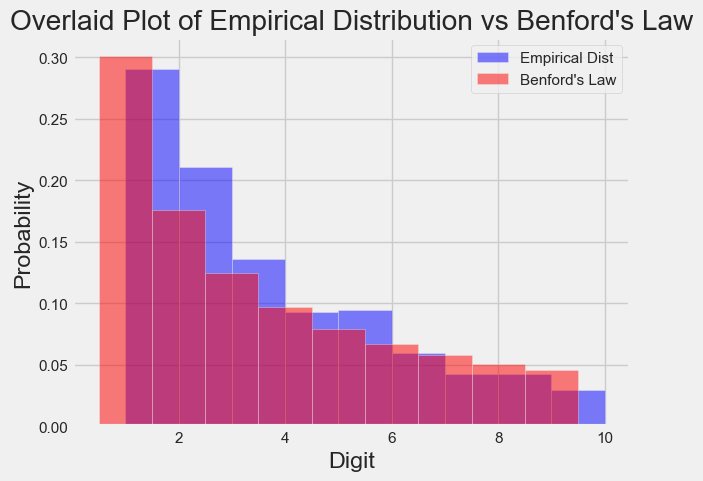

In [109]:
digits_arr = bus_digits['first_char'].astype(int)
bins_arr = range(1, 11)

# DO NOT CHANGE BELOW
benford = np.array([0.301, 0.176, 0.125, 0.097, 0.079, 0.067, 0.058, 0.051, 0.046]) # Array of proportions under Benford's Law
plt.hist(digits_arr, bins = bins_arr, density = True, alpha = 0.5, color = "blue", label = "Empirical Dist") # Plot digits_arr, the empirical distribution
plt.bar(np.arange(1, 10), height = benford, width = 1, alpha = 0.5, color = "red", label = "Benford's Law") # Plot the theoretical distribution under Benford's Law
plt.xlabel("Digit")
plt.ylabel("Probability")
plt.title("Overlaid Plot of Empirical Distribution vs Benford's Law")
plt.legend();

<br/>

---

# 5: Search for the Closest Restaurant

Conan plans to go on a weekend trip to San Francisco, where he hopes to grab some food near Fisherman’s Wharf. He believes that the closer he is to the area the better the food will be, so he chooses a restaurant solely by its coordinates.

## Section 5-1

I will create a new `DataFrame` `bus_coords`, which includes only the rows of `bus_valid` where both the latitude and longitude values are not missing. 

In [79]:
missing_value = -9999.00
bus_coords = bus_valid[(bus_valid['latitude'] != missing_value) & (bus_valid['longitude'] != missing_value)]
bus_coords

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5,first_char
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.76,-122.42,-9999,94110,3
27,1002,BIG MOUTH BURGERS,3392 24th St,San Francisco,CA,94110,37.75,-122.42,-9999,94110,3
51,1003,RINCON PERUANO RESTAURANT,3364 26th St,San Francisco,CA,94110,37.75,-122.42,14155897712,94110,3
52,10030,Marshall Elementary School,1575 15th St,San Francisco,CA,94103,37.77,-122.42,14155246280,94103,1
81,1005,CHAVITA'S MEXICAN RESTAURANT,3006 MISSION St,San Francisco,CA,94110,37.75,-122.42,14155286927,94110,3
...,...,...,...,...,...,...,...,...,...,...,...
6075,9869,Donut World,1399 09th Ave,San Francisco,CA,94122,37.76,-122.49,-9999,94122,1
6117,99,J & M A-1 CAFE RESTAURANT LLC,779 Clay St,San Francisco,CA,94108,37.79,-122.41,-9999,94108,7
6182,994,RAILROAD EXPRESSO CAFE,705 Monterey Blvd,San Francisco,CA,94127,37.73,-122.45,14155334009,94127,7
6190,9948,Whole Foods Market,399 04th St,San Francisco,CA,94107,37.78,-122.40,-9999,94107,3


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />